# COVID-19 Data Analysis

In [1]:
import pandas as pd

### 1. Read the file

In [2]:
df = pd.read_csv("covid.csv")

### 2. Exploring the data

In [3]:
df.head()

,Date,State,Region,Confirmed,Deaths,Recovered
0,4/29/2020,NaN,Afghanistan,1939,60,252
1,4/29/2020,NaN,Albania,766,30,455
2,4/29/2020,NaN,Algeria,3848,444,1702
3,4/29/2020,NaN,Andorra,743,42,423
4,4/29/2020,NaN,Angola,27,2,7


In [4]:
df.tail()

,Date,State,Region,Confirmed,Deaths,Recovered
316,4/29/2020,Wyoming,US,545,7,0
317,4/29/2020,Xinjiang,Mainland China,76,3,73
318,4/29/2020,Yukon,Canada,11,0,0
319,4/29/2020,Yunnan,Mainland China,185,2,181
320,4/29/2020,Zhejiang,Mainland China,1268,1,1263


### 3. Finding the exploring the _null_ values

In [6]:
# showing the no null values

df.count()

Date         321
State        140
Region       321
Confirmed    321
Deaths       321
Recovered    321
dtype: int64

In [7]:
# null values

df.isnull()

,Date,State,Region,Confirmed,Deaths,Recovered
0,False,True,False,False,False,False
1,False,True,False,False,False,False
2,False,True,False,False,False,False
3,False,True,False,False,False,False
4,False,True,False,False,False,False
...,...,...,...,...,...,...
316,False,False,False,False,False,False
317,False,False,False,False,False,False
318,False,False,False,False,False,False
319,False,False,False,False,False,False


In [8]:
# total null values in terms of cout

df.isnull().sum()

Date           0
State        181
Region         0
Confirmed      0
Deaths         0
Recovered      0
dtype: int64

### 4. Heatmap for _null_ values

In [10]:
# null values in terms of heatmap

import seaborn as sb
import matplotlib.pyplot as plt

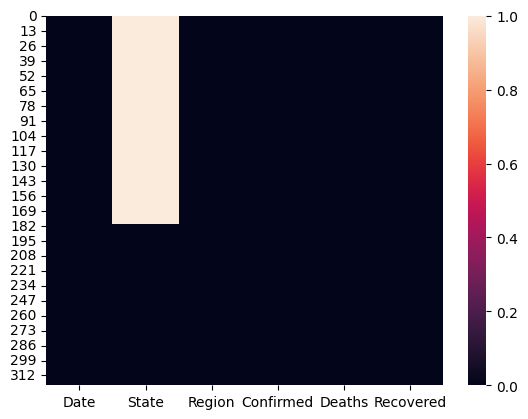

In [11]:
sb.heatmap(df.isnull())
plt.show()

## Research Quesrions

### Q) Show the number of confirmed, deaths and recovered cases in each region

In [77]:
df.head(2)

,Date,State,Region,Confirmed,Deaths,Recovered,Death_Proportion
0,4/29/2020,NaN,Afghanistan,1939,60,252,0.030944
1,4/29/2020,NaN,Albania,766,30,455,0.039164


In [13]:
df.groupby("Region").sum()

,Date,State,Confirmed,Deaths,Recovered
Region,,,,,
Afghanistan,4/29/2020,0,1939,60,252
Albania,4/29/2020,0,766,30,455
Algeria,4/29/2020,0,3848,444,1702
Andorra,4/29/2020,0,743,42,423
Angola,4/29/2020,0,27,2,7
...,...,...,...,...,...
West Bank and Gaza,4/29/2020,0,344,2,71
Western Sahara,4/29/2020,0,6,0,5
Yemen,4/29/2020,0,6,0,1


In [14]:
# top 15

df.groupby("Region").sum(15)

,Confirmed,Deaths,Recovered
Region,,,
Afghanistan,1939,60,252
Albania,766,30,455
Algeria,3848,444,1702
Andorra,743,42,423
Angola,27,2,7
...,...,...,...
West Bank and Gaza,344,2,71
Western Sahara,6,0,5
Yemen,6,0,1


### Q) Show only recovered cases by origin in descending order

In [78]:
df.groupby("Region")["Confirmed"].sum().sort_values(ascending = False).head(10)

Region
US                1039909
Spain              236899
Italy              203591
France             166543
UK                 166441
Germany            161539
Turkey             117589
Russia              99399
Iran                93657
Mainland China      82862
Name: Confirmed, dtype: int64

In [ ]:
### Q) Show only recovered and deaths cases by origin in descending order

In [79]:
df.groupby("Region")[["Confirmed", "Deaths"]].sum()

,Confirmed,Deaths
Region,,
Afghanistan,1939,60
Albania,766,30
Algeria,3848,444
Andorra,743,42
Angola,27,2
...,...,...
West Bank and Gaza,344,2
Western Sahara,6,0
Yemen,6,0


### Q) Remove all the records where confrmed cases in less than 10

In [80]:
df[df.Confirmed < 10]

,Date,State,Region,Confirmed,Deaths,Recovered,Death_Proportion
18,4/29/2020,NaN,Bhutan,7,0,5,0.000000
98,4/29/2020,NaN,MS Zaandam,9,2,0,0.222222
105,4/29/2020,NaN,Mauritania,8,1,6,0.125000
126,4/29/2020,NaN,Papua New Guinea,8,0,0,0.000000
140,4/29/2020,NaN,Sao Tome and Principe,8,0,4,0.000000
177,4/29/2020,NaN,Western Sahara,6,0,5,0.000000
178,4/29/2020,NaN,Yemen,6,0,1,0.000000
184,4/29/2020,Anguilla,UK,3,0,3,0.000000
192,4/29/2020,"Bonaire, Sint Eustatius and Saba",Netherlands,5,0,0,0.000000
194,4/29/2020,British Virgin Islands,UK,6,1,3,0.166667


In [28]:
ndf = df[~(df.Confirmed < 10)]

In [29]:
ndf

,Date,State,Region,Confirmed,Deaths,Recovered
0,4/29/2020,NaN,Afghanistan,1939,60,252
1,4/29/2020,NaN,Albania,766,30,455
2,4/29/2020,NaN,Algeria,3848,444,1702
3,4/29/2020,NaN,Andorra,743,42,423
4,4/29/2020,NaN,Angola,27,2,7
...,...,...,...,...,...,...
316,4/29/2020,Wyoming,US,545,7,0
317,4/29/2020,Xinjiang,Mainland China,76,3,73
318,4/29/2020,Yukon,Canada,11,0,0
319,4/29/2020,Yunnan,Mainland China,185,2,181


In [30]:
# rows affected

321 - 304

17

### Q) In which region max numer of confirmed cases were recorded

In [81]:
df.head(2)

,Date,State,Region,Confirmed,Deaths,Recovered,Death_Proportion
0,4/29/2020,NaN,Afghanistan,1939,60,252,0.030944
1,4/29/2020,NaN,Albania,766,30,455,0.039164


In [34]:
df.groupby("Region").Confirmed.sum().sort_values(ascending = False).head(1)

Region
US    1039909
Name: Confirmed, dtype: int64

### Q) In which region minimum numbers of deaths were recorded

In [82]:
df.head(2)

,Date,State,Region,Confirmed,Deaths,Recovered,Death_Proportion
0,4/29/2020,NaN,Afghanistan,1939,60,252,0.030944
1,4/29/2020,NaN,Albania,766,30,455,0.039164


In [36]:
df.groupby("Region").Deaths.sum().sort_values(ascending = True).head(1)

Region
Laos    0
Name: Deaths, dtype: int64

### Q) How many confirmed, deaths and recovered cases were reported from india till 29th April 2020

In [83]:
df.head(2)

,Date,State,Region,Confirmed,Deaths,Recovered,Death_Proportion
0,4/29/2020,NaN,Afghanistan,1939,60,252,0.030944
1,4/29/2020,NaN,Albania,766,30,455,0.039164


In [38]:
df[df.Region == "India"]

,Date,State,Region,Confirmed,Deaths,Recovered
74,4/29/2020,NaN,India,33062,1079,8437


### Q) Sort the entire data wrt number of confirmed cases in ascending order

In [84]:
df.head(2)

,Date,State,Region,Confirmed,Deaths,Recovered,Death_Proportion
0,4/29/2020,NaN,Afghanistan,1939,60,252,0.030944
1,4/29/2020,NaN,Albania,766,30,455,0.039164


In [40]:
df.sort_values(by = ["Confirmed"], ascending = True).head(50)

,Date,State,Region,Confirmed,Deaths,Recovered
285,4/29/2020,Recovered,US,0,0,120720
284,4/29/2020,Recovered,Canada,0,0,20327
203,4/29/2020,Diamond Princess cruise ship,Canada,0,1,0
305,4/29/2020,Tibet,Mainland China,1,0,1
289,4/29/2020,Saint Pierre and Miquelon,France,1,0,0
184,4/29/2020,Anguilla,UK,3,0,3
192,4/29/2020,"Bonaire, Sint Eustatius and Saba",Netherlands,5,0,0
272,4/29/2020,Northwest Territories,Canada,5,0,0
288,4/29/2020,Saint Barthelemy,France,6,0,6
178,4/29/2020,NaN,Yemen,6,0,1


### Q Sort the entire data wrt no of recovered cases in descending order

In [85]:
df.head(2)

,Date,State,Region,Confirmed,Deaths,Recovered,Death_Proportion
0,4/29/2020,NaN,Afghanistan,1939,60,252,0.030944
1,4/29/2020,NaN,Albania,766,30,455,0.039164


In [42]:
df.sort_values(by = ["Recovered"], ascending = False).head(50)

,Date,State,Region,Confirmed,Deaths,Recovered
153,4/29/2020,NaN,Spain,236899,24275,132929
285,4/29/2020,Recovered,US,0,0,120720
61,4/29/2020,NaN,Germany,161539,6467,120400
76,4/29/2020,NaN,Iran,93657,5957,73791
80,4/29/2020,NaN,Italy,203591,27682,71252
229,4/29/2020,Hubei,Mainland China,68128,4512,63616
57,4/29/2020,NaN,France,165093,24087,48228
167,4/29/2020,NaN,Turkey,117589,3081,44040
22,4/29/2020,NaN,Brazil,79685,5513,34132
158,4/29/2020,NaN,Switzerland,29407,1716,22600


## Visual Analysis

### Q) What is the distribution of deaths across different regions?

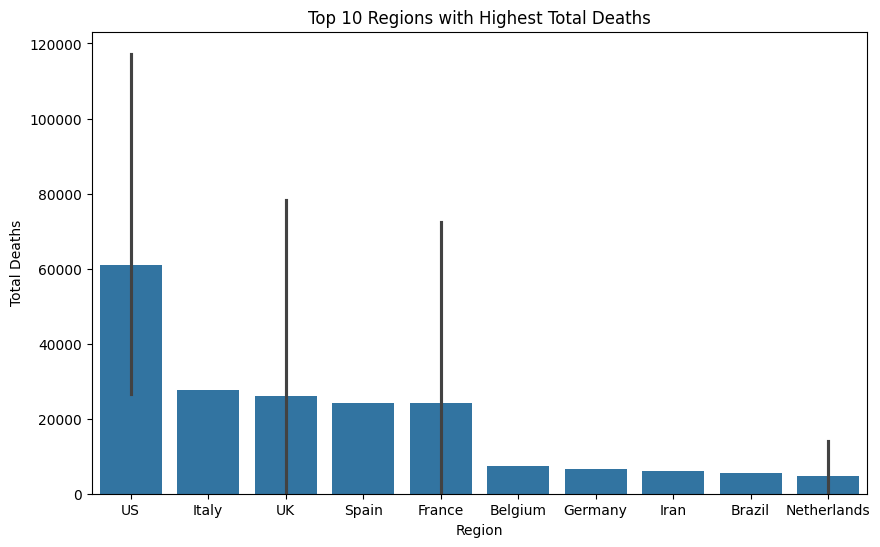

In [86]:
top_10_regions = df.groupby('Region')['Deaths'].sum().nlargest(10).index

plt.figure(figsize=(10, 6))
sb.barplot(data=df[df['Region'].isin(top_10_regions)], x='Region', y='Deaths', estimator=sum, order=top_10_regions)
plt.title('Top 10 Regions with Highest Total Deaths')
plt.xlabel('Region')
plt.ylabel('Total Deaths')
plt.xticks(rotation=0)
plt.show()

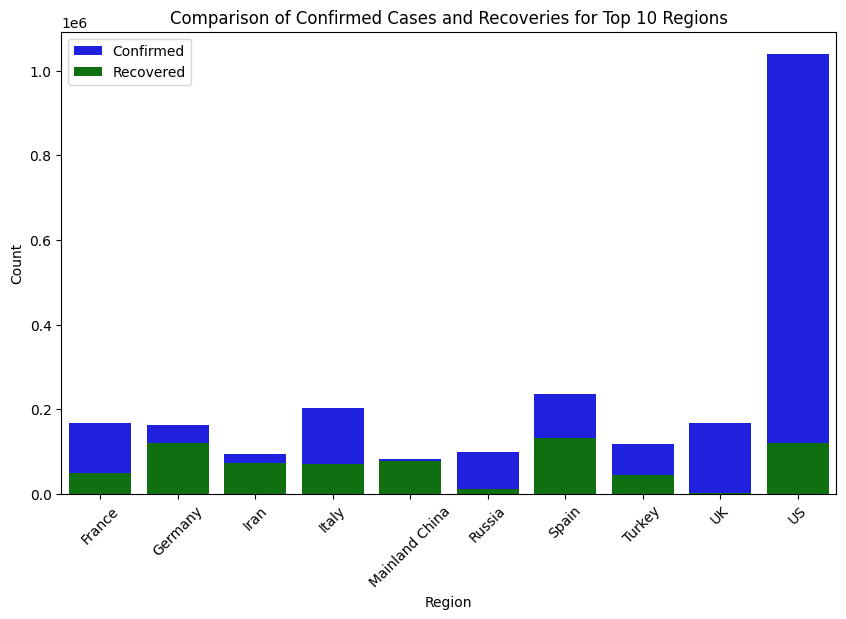

In [87]:
top_10_regions_confirmed = df.groupby('Region')['Confirmed'].sum().nlargest(10).index
df_top_10 = df[df['Region'].isin(top_10_regions_confirmed)]

df_grouped_top_10 = df_top_10.groupby('Region')[['Confirmed', 'Recovered']].sum().reset_index()

plt.figure(figsize=(10, 6))
sb.barplot(data=df_grouped_top_10, x='Region', y='Confirmed', color='blue', label='Confirmed')
sb.barplot(data=df_grouped_top_10, x='Region', y='Recovered', color='green', label='Recovered')
plt.title('Comparison of Confirmed Cases and Recoveries for Top 10 Regions')
plt.xlabel('Region')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.legend()
plt.show()

### Q) How do the number of confirmed cases and recoveries compare across regions?

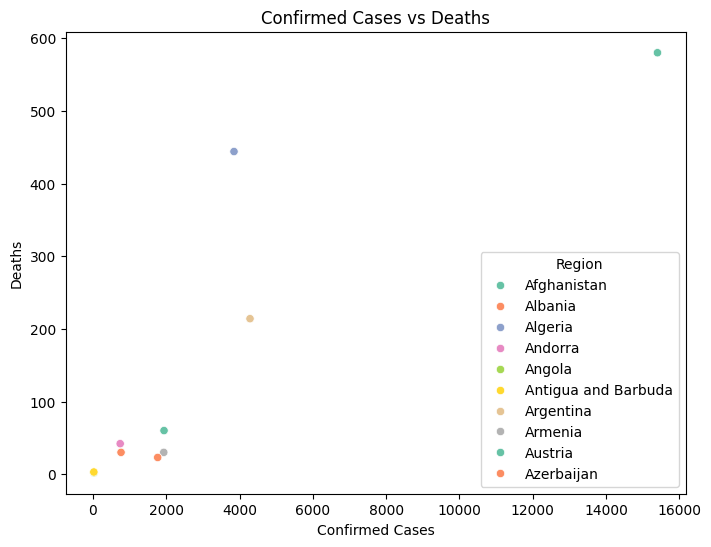

In [61]:
plt.figure(figsize=(8, 6))
sb.scatterplot(data=df.head(10), x='Confirmed', y='Deaths', hue='Region', palette='Set2')
plt.title('Confirmed Cases vs Deaths')
plt.xlabel('Confirmed Cases')
plt.ylabel('Deaths')
plt.show()

### Q) What is the proportion of deaths to confirmed cases across different regions?

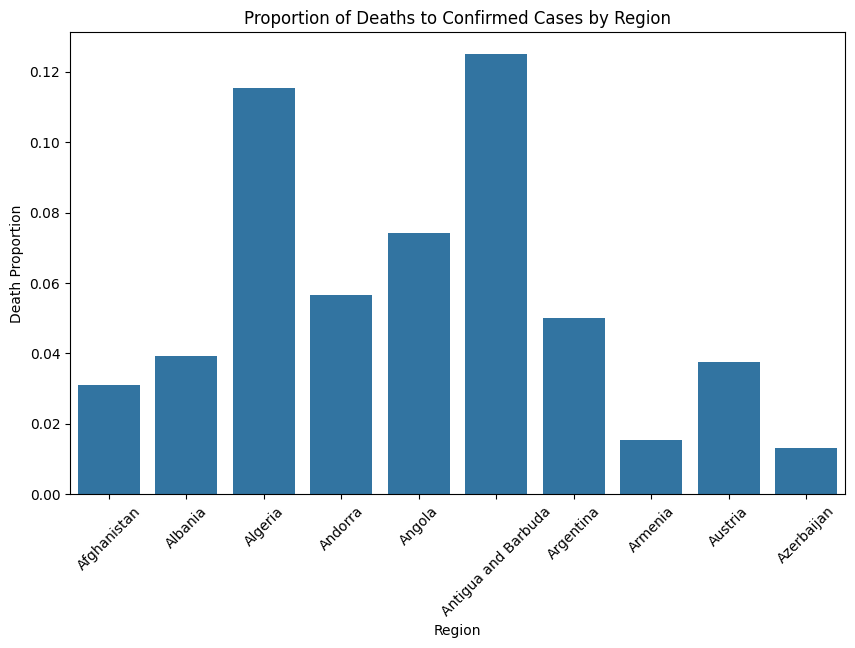

In [89]:
df['Death_Proportion'] = df['Deaths'] / df['Confirmed']

plt.figure(figsize=(10, 6))
sb.barplot(data=df.head(10), x='Region', y='Death_Proportion', estimator=sum)
plt.title('Proportion of Deaths to Confirmed Cases by Region')
plt.xlabel('Region')
plt.ylabel('Death Proportion')
plt.xticks(rotation=45)
plt.show()

### Q) How do the distributions of confirmed cases vary across different regions?

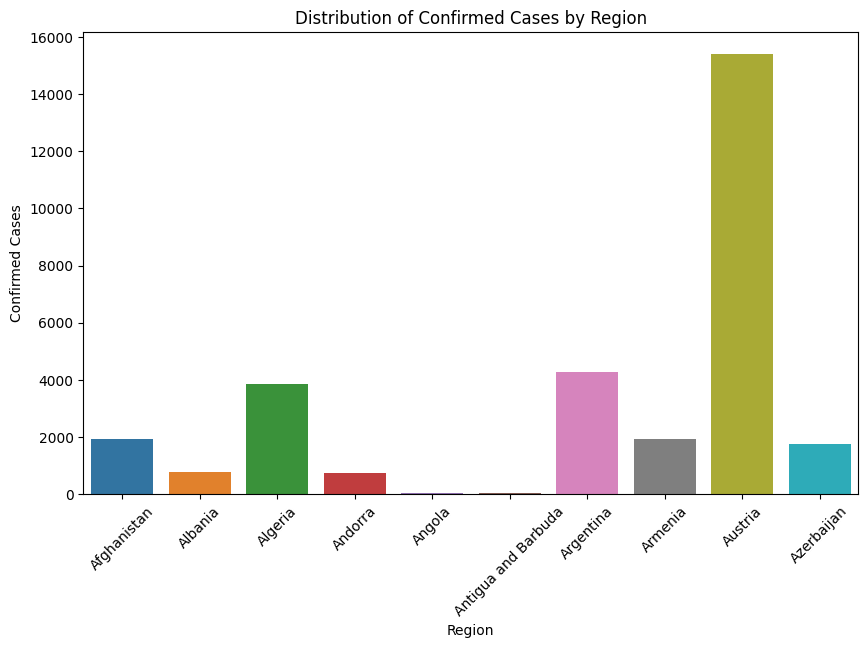

In [90]:
plt.figure(figsize=(10, 6))
sb.barplot(data=df.head(10), x='Region', y='Confirmed', hue = "Region", legend = False)
plt.title('Distribution of Confirmed Cases by Region')
plt.xlabel('Region')
plt.ylabel('Confirmed Cases')
plt.xticks(rotation=45)
plt.show()

-----